# Bank Marketing Campaign

### Irvant Ismail

### Outline

- Business Problem Understanding
- Data Understanding
- Data Cleaning
- Data Analyst
- Preprocessing Data & Features Engineering
- Modelling
- Conclusion

## Business Problem

#### Latar Belakang

Seiring perkembangan zaman yang semakin maju, menuntut berbagai industri di Indonesia berinovasi. Salah satunya disektor perbankan, untuk memperkenalkan dan menawarkan produk deposito, satu cara nya dengan melakukan campaign marketing. Namun marketing campaign yang berjalan tetap memiliki resiko perbandingan berhasil dan tidak

Hal ini menunjukkan bahwa pentingnya mengidentifikasi faktor - faktor apa saja yang menjadi pendukung keberhasilan suatu nasabah mengajukan deposito, salah satunya adalah dengan mengidentifikasi perilaku customer. Sebuah perusahaan perbankan ingin melakukan identifikasi dan mengevaluasi faktor - faktor pendorong customer yang akan melakukan "Deposito". Dengan menganalisis variabel utama pada data set dibawah ini, kita dapat mengidentifikasi nasabah potensial yang cenderung akan melakukan deposito. Dengan demikian campaign marketing selanjutnya dapat menyesuaikan dengan target nasabah potensial dan menyusun campaign yang menarik sesuai dengan demografi tertentu.





#### Pernyataan Masalah

Perusahaan ingin memperkenalkan produk baru nya, oleh karena itu perusahaan melakukan strategi campaign marketing. namun setelah dianalisis campaign marketing yang dilakukan kurang efektif karena banyak customer yang belum tertarik

#### Tujuan

Berdasarkan permasalahan diatas, perusahaan dapat melakukan tindakan preventif yaitu dengan prediksi nasabah yang berpotensi deposito. Dengan mengetahui nasabah yang berpotensi untuk deposito, strategi pemasaran yang diberikan lebih tepat sasaran. Hal ini dapat menurunkan biaya marketing dan mempersingkat waktu campaign

Selain itu, dengan mengetahui faktor apa saja yang mempengaruhi nasabah deposito dapat menjadi pendukung pengambilan keputusan strategi pemasaran.

#### Analytics Approach

Pendekatan analitik yang dilakukan berupa identifikasi pola, evaluasi, dan implementasi model machine learning klasifikasi yang dapat memprediksi nasabah yang potensial untuk melakukan deposito berdasarkan riwayat data sebelumnya.

#### Metrik Evaluation

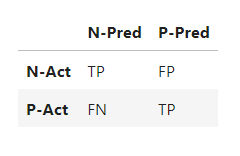

Type 1 error : False Positive
Konsekuensi: pengeluaran cost yang tidak tepat atau nasabah tidak berpotensi

Type 2 error : False Negative
Konsekuensi: kehilangan nasabah potensial

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost campaign dari perusahaan tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup kandidat potensial yang dibutuhkan perusahaan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Recall dan precision yang diseimbangkan akan dari kelas positif (Nasabah potensial). Metrik yang akan digunakan adalah ROC-AUC.

## Data Understanding

Sumber Dataset :

Penjelasan DataSet

In [693]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors

# FE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from scipy.stats import shapiro

from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Saving Model
import pickle

In [694]:
# import dataset
bank_marketing_campaign = pd.read_csv(r"C:\Users\mahfu\Downloads\data_bank_marketing_campaign.csv")
bank_marketing_campaign

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [695]:
# tipe data
bank_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [696]:
display(bank_marketing_campaign.describe(), bank_marketing_campaign.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


## Data Cleaning

### Data Typo dan Duplikat

In [697]:
# Data unik masing-masing fitur
listItem = []
for col in bank_marketing_campaign.columns :
    listItem.append([col, bank_marketing_campaign[col].nunique(), bank_marketing_campaign[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,12,"[admin., self-employed, services, housemaid, t..."
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,4,"[unknown, other, failure, success]"


Dari data diatas terdapat data typo dan terdapat nilai tidak diketahui pada kolom 'job'. selain itu pada values pada kolom balance terdapat negatif dan pada kolom (Contact dan poutcome) terdapat values unknown

In [698]:
# cek kolom job
bank_marketing_campaign.job.value_counts()

management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: job, dtype: int64

mengubah nilai yang typo dan khusus pada kolom job nilai 'unknown' saya ubah sebagai menjadi management menggunakan nilai modus

In [699]:
# replace several values
change_value = {
                'admin.' : 'admin',
                'unknown' : 'management'
}

bank_marketing_campaign['job'].replace(change_value, inplace=True)

Setelah kategori sudah disesuaikan, akan dilihat apabila terdapat data duplikat. Karena tidak adanya informasi Customer ID sehingga langkah yang dilakukan adalah melihat setiap baris yang memiliki data yang sama.

In [700]:
# Melihat Jumlah Data Duplikat
Duplikat = bank_marketing_campaign.duplicated().sum()
PersentaseDup = round((bank_marketing_campaign.duplicated().sum()/bank_marketing_campaign.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 8, Persentase Data Duplikat: 0.1


terdapat 8 data duplikat dengan persentase 0.1%. karena tidak adanya informasi tambahan mengenai baris duplikat tersebut kita tidak bisa manipulate, maka kita anggap memang data sama persis dan cara handle nya drop dari dataset.

In [701]:
# Menghapus data duplikat
bank_marketing_campaign.drop_duplicates(inplace=True)
print(f'banyak data: {bank_marketing_campaign.shape}, update data duplikat: {bank_marketing_campaign.duplicated().sum()}')

banyak data: (7805, 11), update data duplikat: 0


### Missing values pada Data

selanjutnya kita akan melihat data hilang/kosong pada dataset

In [702]:
# Cek data hilang
bank_marketing_campaign.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

### Distribusi Data Numerik

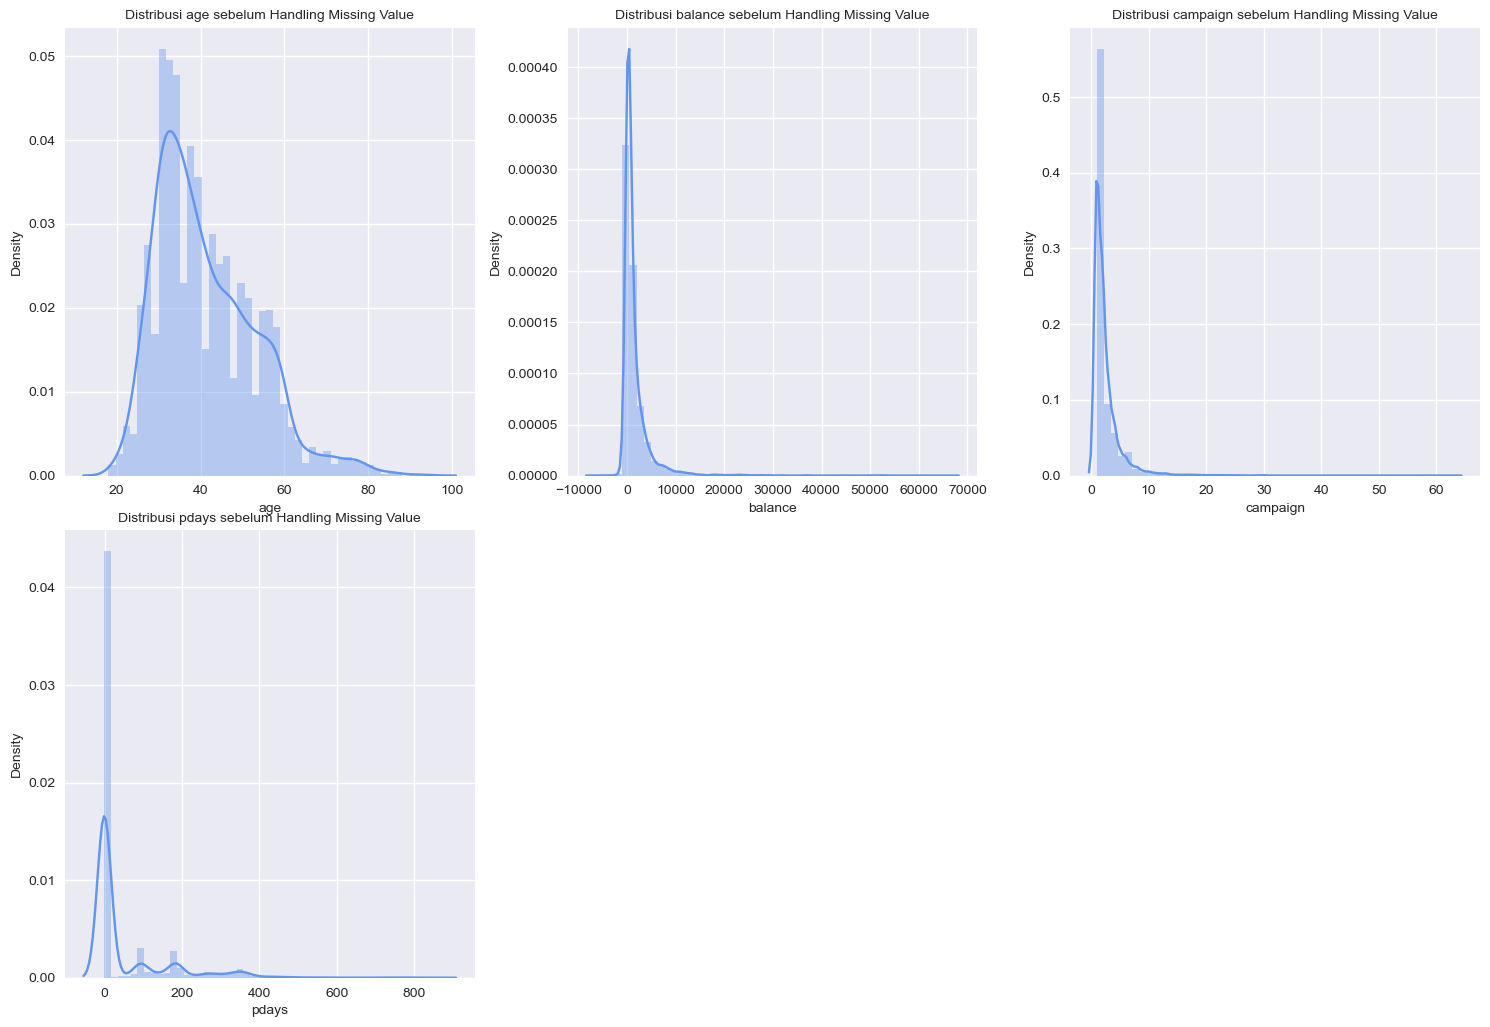

In [703]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['age','balance','campaign','pdays']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(bank_marketing_campaign[features[i]], color='cornflowerblue')
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Outlier

Dalam melakukan modelling dan features engineering terdapat beberapa model yang sensitif terhadap outlier, sehingga akan dianalisa bagaimana tingkat penyebaran outlier dalam data numerik ini

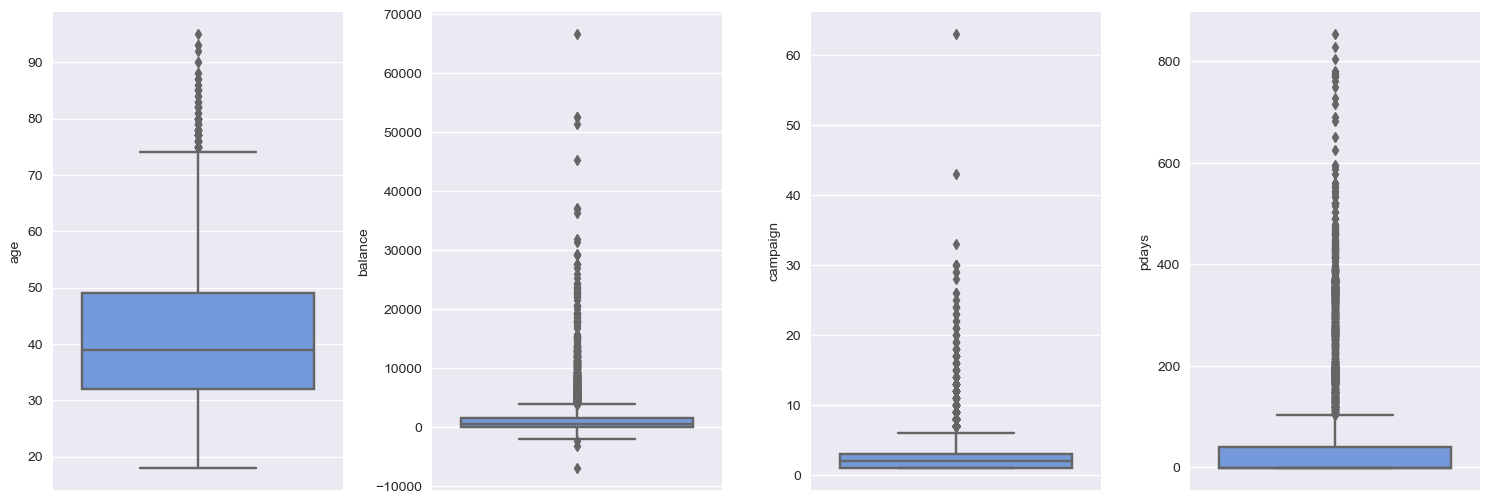

In [704]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['age','balance','campaign','pdays']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=bank_marketing_campaign[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

In [705]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(features)):
    Q1 = bank_marketing_campaign[features[i]].quantile(0.25)
    Q3 = bank_marketing_campaign[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (bank_marketing_campaign[features[i]]< lower_bound) | (bank_marketing_campaign[features[i]]> upper_bound)
    outlier = bank_marketing_campaign.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/bank_marketing_campaign[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound age adalah 6.5, dan Upper Bound age adalah 74.5 , terdapat 121 data yang menyimpang dari data biasanya, yaitu sebanyak 1.55%
Lower Bound balance adalah -2207.5, dan Upper Bound balance adalah 4020.5 , terdapat 736 data yang menyimpang dari data biasanya, yaitu sebanyak 9.43%
Lower Bound campaign adalah -2.0, dan Upper Bound campaign adalah 6.0 , terdapat 429 data yang menyimpang dari data biasanya, yaitu sebanyak 5.5%
Lower Bound pdays adalah -64.0, dan Upper Bound pdays adalah 104.0 , terdapat 1432 data yang menyimpang dari data biasanya, yaitu sebanyak 18.35%


## Data Analysis

setelah kita memahami karakteristik dari setiap kolom dan nilai nya, kita akan mengidentifikasi bagaimana karakteristik nasabah potensial dan tidak

In [706]:
bank_marketing_campaign

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,management,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin,54,yes,no,cellular,nov,1,-1,unknown,no


#### variable numerik vs Deposit

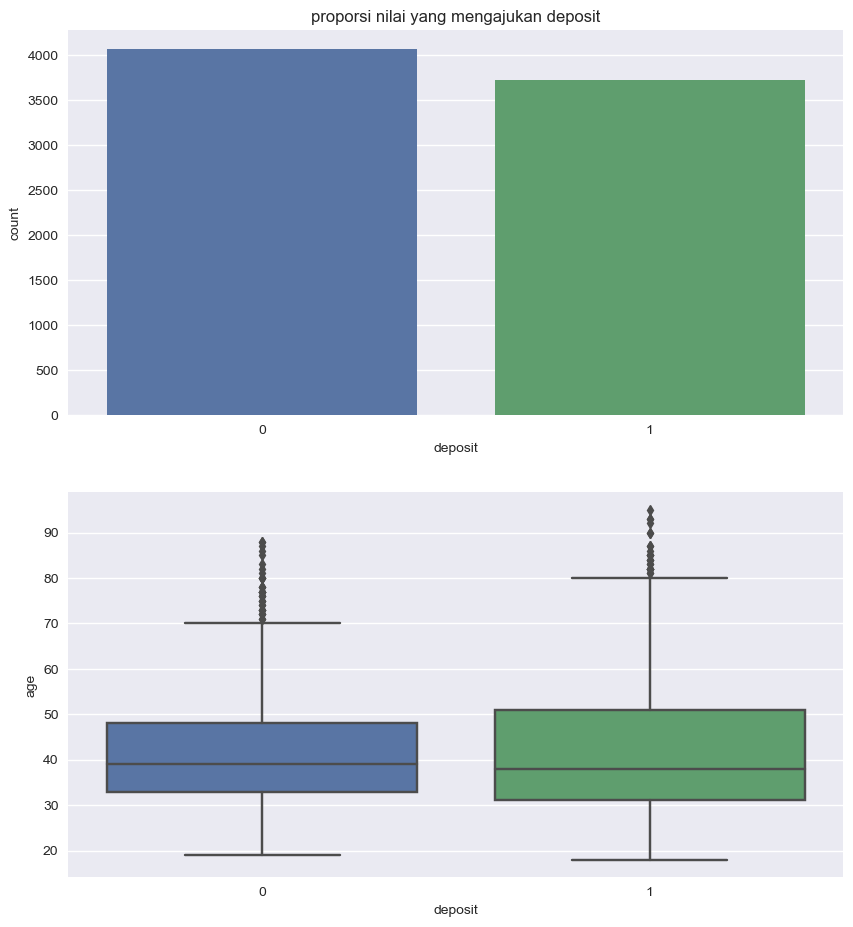

In [750]:
plt.figure(figsize=(10,17))
plt.subplot(311)
sns.countplot(x="deposit", data=bank_marketing_campaign)
plt.title('proporsi nilai yang mengajukan deposit')

plt.subplot(312)
sns.boxplot(data = bank_marketing_campaign, x="deposit", y= "age")
plt.show()

Kesimpulan Chart diatas :
- pada kolom deposit, nasabah yang ingin melakukan deposit tidak seimbang, oleh karena itu saat pemodelan akan lebih baik performanya jika menyeimbangkan data pada kolom deposit
- usia nasabah yang ingin melakukan deposit berada di rentang 32 tahun - 52 tahun, sedangkan yang tidak ingin melakukan deposit berada direntang 34 - 48 tahun

#### Varible Kategorik vs Deposit

In [708]:
# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = bank_marketing_campaign[bank_marketing_campaign['deposit'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = bank_marketing_campaign[bank_marketing_campaign['deposit'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

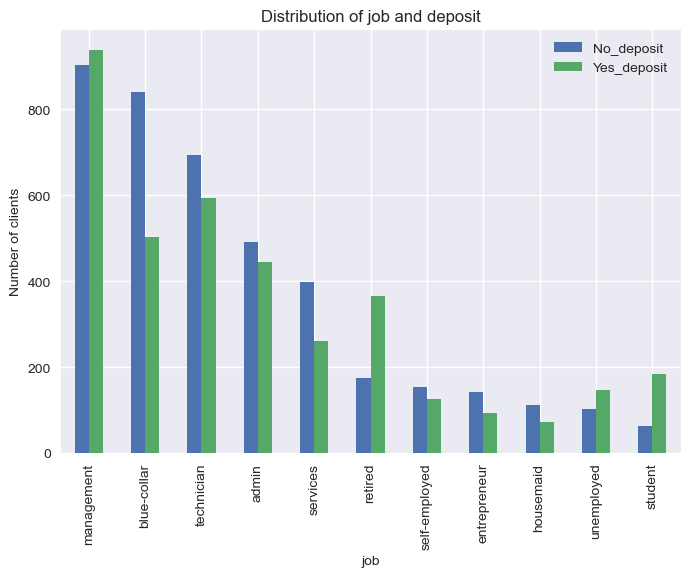

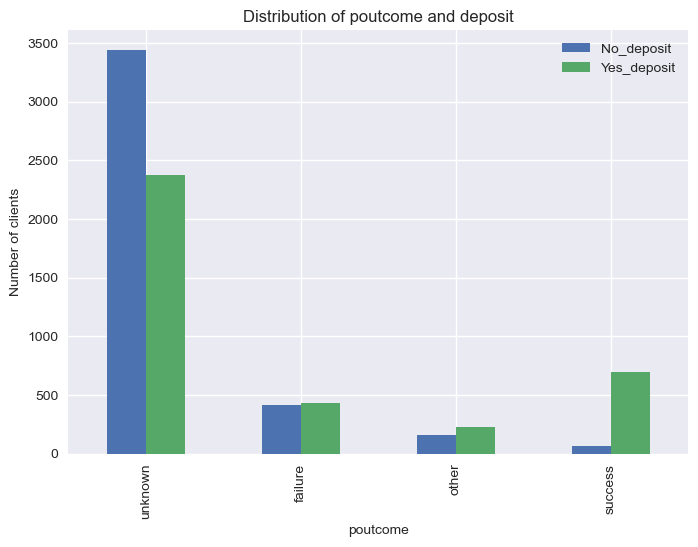

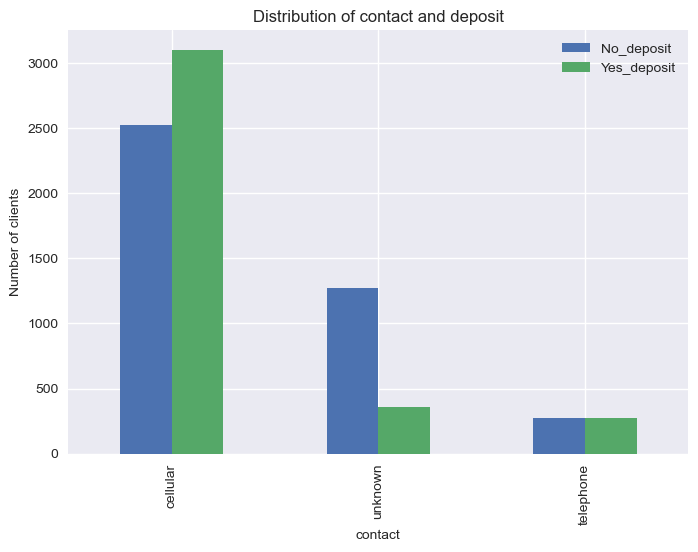

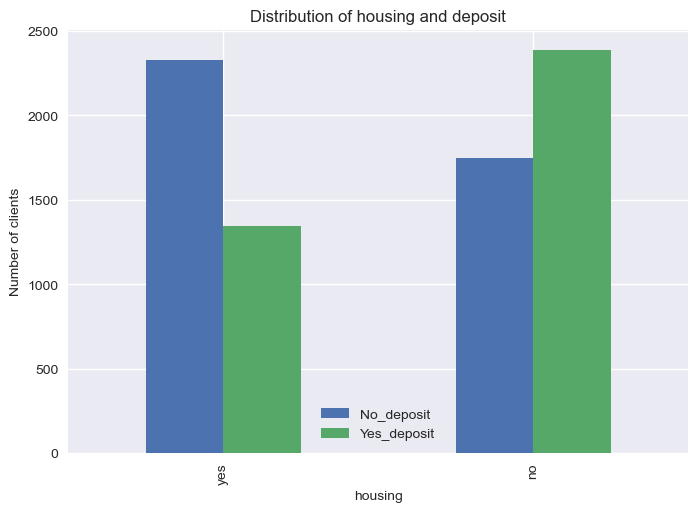

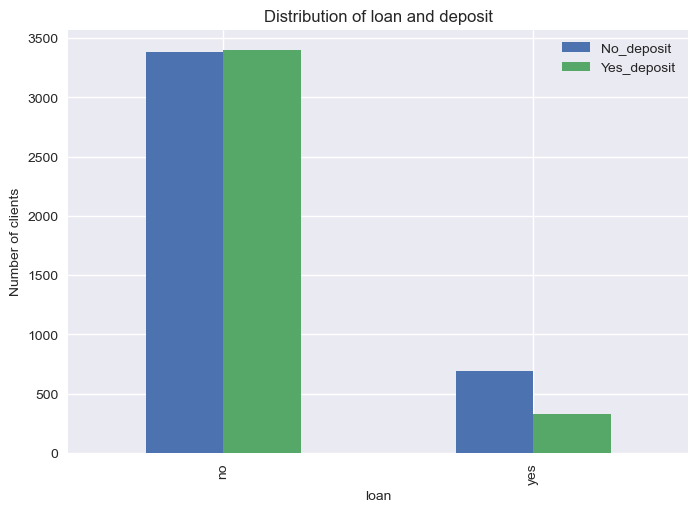

(None, None, None, None, None)

In [709]:
plot_bar('job'), plot_bar('poutcome'), plot_bar('contact'), plot_bar('housing'), plot_bar('loan')

Kesimpulan dari BarChart Variabel Kategorik, karakteristik nasabah yang cenderung melakukan deposit sebagai berikut :
- Job : jenis Pekerjaan nasabah yang lebih banyak mengajukan deposito adalah Management, Retired, Unemployee, Student
- Poutcome : Nasabah yang mengajukan deposito dengan status poutcome Success
- Contact : Nasabah yang mengajukan deposito disaat dihubungi melalui Cellular lebih banyak
- Housing : kebanyakan nasabah yang mengajukan deposito yang berstatus tidak memiliki rumah
- Loan : Rata -rata nasabah mengajukan deposito berstatus tidak memiliki Pinjaman


## Data Preprocessing

pada tahap ini, kita akan melakukan data preprocessing dan feature engineering sebagai berikut:
- Akan mengelompokkan kolom 'age' dan menambahkan fitur baru berdasarkan website yang kategori umur dibagi menjadi 5 dengan rentang usia tertentu
- melakukan handling missing value pada kolom 'job' dan mengisinya dengan most frequent
- melakukan one hot encoding pada kolom 'contact' dan 'poutcome'
- melakukan binary encoding pada kolom job karena memiliki kategori yang cukup banyak, dan tidak ada susunan tertentu
- melakukan ordinal encoding pada kolom baru 'agegroup' dan 'balance' karena memiliki susunan atau urutan tertentu

#### Binning

In [710]:
# Melakukan binning pada kategori cashbackamount
bin_labels= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
bank_marketing_campaign['balance_bined']= pd.cut(bank_marketing_campaign['balance'], 5,labels = bin_labels)
bank_marketing_campaign.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,balance_bined
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,yes,Sangat Kecil
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Sangat Kecil
2,51,admin,3025,no,no,cellular,may,1,352,other,yes,Sangat Kecil
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Sangat Kecil
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Sangat Kecil


#### Grouping Umur menjadi data kategorikal

In [712]:
bank_marketing_campaign['age'].describe()

count    7805.000000
mean       41.257783
std        11.922833
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64

In [713]:
age_groups = []
for i in bank_marketing_campaign['age']:
    if i <= 11:
        age_groups.append('Children')
    if i > 11 and i <= 16:
        age_groups.append('Early Teenage')
    if i > 16 and i <= 25:
        age_groups.append('Late Teenage')
    if i > 25 and i <= 35:
        age_groups.append('Early Adult')
    if i > 35 and i <= 45:
        age_groups.append('Late Adult')
    if i > 45 and i <= 55:
        age_groups.append('Early Elderly')
    if i > 55 and i <= 65:
        age_groups.append('Late Elderly')
    if i > 65:
        age_groups.append('Old')
        
bank_marketing_campaign['agegroup'] = age_groups

Mengelompok kategori umur menjadi ['Children', 'Teenage', 'Adult', 'Eiderly', 'Old]

In [714]:
bank_marketing_campaign.isna()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,balance_bined,agegroup
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,False,False,False,False,False,False,False,False,False,False,False,False,False
7809,False,False,False,False,False,False,False,False,False,False,False,False,False
7810,False,False,False,False,False,False,False,False,False,False,False,False,False
7811,False,False,False,False,False,False,False,False,False,False,False,False,False


In [715]:
bank_marketing_campaign.contact.value_counts()

cellular     5623
unknown      1636
telephone     546
Name: contact, dtype: int64

#### Encoding

1. Mengubah label pada kolom deposito

In [716]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(bank_marketing_campaign['deposit'])
 
# printing label
label

array([1, 1, 1, ..., 0, 0, 1])

In [717]:
bank_marketing_campaign["deposit"] = label

In [718]:
bank_marketing_campaign

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,balance_bined,agegroup
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,1,Sangat Kecil,Early Elderly
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,Sangat Kecil,Late Adult
2,51,admin,3025,no,no,cellular,may,1,352,other,1,Sangat Kecil,Early Elderly
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,Sangat Kecil,Late Adult
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,Sangat Kecil,Late Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1,Sangat Kecil,Late Elderly
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1,Sangat Kecil,Early Elderly
7810,36,management,179,no,no,cellular,aug,8,-1,unknown,0,Sangat Kecil,Late Adult
7811,31,admin,54,yes,no,cellular,nov,1,-1,unknown,0,Sangat Kecil,Early Adult


In [719]:
bank_marketing_campaign.month.value_counts()

may    1973
aug    1081
jul    1049
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: month, dtype: int64

In [720]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'balance_bined',
    'mapping':{
        'Sangat Kecil' : 0,
        'Kecil': 1, 
        'Sedang': 2, 
        'Besar' : 3, 
        'Sangat Besar' : 4,
    }},
    {'col' : 'month',
     'mapping' :{
         'jan' : 0,
         'feb' : 1,
         'mar' : 2,
         'apr' : 3,
         'may' : 4,
         'jun' : 5,
         'jul' : 6,
         'aug' : 7,
         'sep' : 8,
         'oct' : 9,
         'nov' : 10,
         'dec' : 11,
     }},
     {'col' : 'agegroup',
      'mapping' :{
          'Late Teenage' : 0,
          'Early Adult' : 1,
          'Late Adult' : 2,
          'Early Elderly' : 3,
          'Late Elderly' : 4,
          'Old' : 5,
      }}
]

### Data Splitting

In [721]:
from sklearn.impute import SimpleImputer

In [722]:
X = bank_marketing_campaign.drop(columns= "deposit")
y = bank_marketing_campaign.deposit

In [723]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, stratify= y, random_state= 42)

In [724]:
features_encoding_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['housing', 'loan', 'contact', 'poutcome']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['month','balance_bined','agegroup']),
    ('binary', ce.BinaryEncoder(), ['job'])
], remainder='passthrough', verbose_feature_names_out= False) 

In [725]:
X_train_preprocess = features_encoding_transformer.fit_transform(X_train)
X_test_preprocess = features_encoding_transformer.transform(X_test)

In [726]:
X_preprocess = features_encoding_transformer.fit_transform(X_train)
X_preprocess = pd.DataFrame(X_preprocess, columns= features_encoding_transformer.get_feature_names_out())
X_preprocess

,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month,balance_bined,agegroup,job_0,job_1,job_2,job_3,age,balance,campaign,pdays
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,2.0,0.0,0.0,0.0,1.0,36.0,172.0,1.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,33.0,32.0,7.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,935.0,1.0,91.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,55.0,264.0,2.0,-1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,33.0,706.0,1.0,322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,866.0,2.0,-1.0
6240,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,56.0,-9.0,1.0,-1.0
6241,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,32.0,604.0,2.0,196.0
6242,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0,33.0,523.0,1.0,-1.0


In [727]:
X_train_preprocess

array([[  0.,   0.,   0., ..., 172.,   1.,  -1.],
       [  0.,   0.,   0., ...,  32.,   7.,  -1.],
       [  0.,   0.,   0., ..., 935.,   1.,  91.],
       ...,
       [  0.,   0.,   0., ..., 604.,   2., 196.],
       [  1.,   0.,   0., ..., 523.,   1.,  -1.],
       [  0.,   0.,   1., ..., 211.,   3.,  -1.]])

## Modelling

Pada project machine learning data set bank marketing campaign metode klasifikasi yang akan diuji coba sebagai penentuan model terbaik untuk dataset ini, antara lain Logistic Regression, KNearest Neighbour, Decision Tree, Random Forest, dan XGBoost.

In [728]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [729]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

In [730]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

In [731]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',features_encoding_transformer),
        ('resampling', smote_),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)


,mean roc_auc,sdev
model,,
XGBoost,0.758770,0.009976
Random Forest,0.754231,0.006170
Logistic Regression,0.709722,0.018143
Decision Tree,0.630617,0.012774
KNN,0.602025,0.010363


In [732]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=0)
    estimator=Pipeline([
        ('preprocess',features_encoding_transformer),
        ('resampling', smote_),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67       815
           1       0.64      0.64      0.64       746

    accuracy                           0.66      1561
   macro avg       0.65      0.65      0.65      1561
weighted avg       0.66      0.66      0.66      1561



KNN 
               precision    recall  f1-score   support

           0       0.61      0.62      0.62       815
           1       0.58      0.57      0.57       746

    accuracy                           0.60      1561
   macro avg       0.59      0.59      0.59      1561
weighted avg       0.59      0.60      0.59      1561

Decision Tree 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       815
           1       0.60      0.61      0.61       746

    accuracy                           0.62      1561
   macro avg       0.62      0.62      0.62      1561
weighted avg       0.62      0.62      0.62      1561

Random Forest 
               precision    recall  f1-score   support

           0       0.70      0.75      0.73       815
           1       0.71      0.66      0.68       746

    accuracy                           0.71      1561
   macro avg       0.71      0.70      0.70      1561
weighted avg       0.71      0.71   

,roc_auc score
model,
Random Forest,0.760248
XGBoost,0.755810
Logistic Regression,0.727806
Decision Tree,0.621966
KNN,0.615613


Dari data diatas dapat dilihat untuk Random Forest dan XGBoost merupakan model dengan ROC_AUC tertinggi yaitu masing-masing 0.760 dan 0.755. Sehingga step selanjutnya adalah meningkatkan performa dengan melakukan tuning hyperparameter pada model Random Forest dan XGBoost, selanjutnya dibandingkan dua model tersebut

### Hyperparameter Tuning

Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model Random forest dan XGBoost, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:

- XGBoost : learning rate (default 0,3), max_depth (default 6), n_estimators (default 100), subsample (default 1)
- Logistic Regression : learning rate

In [733]:
smote_ = SMOTE(random_state=0)
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('preprocess', features_encoding_transformer),('resampling', smote_), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('preprocess', features_encoding_transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(X_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[0]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc', 
                      error_score='raise',
                      verbose = 2)
xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   3.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   3.3s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   3.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   3.1s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   3.0s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   3.0s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'balance_bined',
                                                                                                  'data_type': dtype('O'),
                                                                                                  '...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             param_grid=[{'model_xgb__learning_rate': [0.3, 0.08],
                          'model_xgb__max_depth': [17, 19],
                          'model_xgb__n_estimators': [190, 200],
                          'model_xgb__random_state': [0],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [734]:
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_) 

Random Forest Hyperparameter
0.7760952636758891
{'model_rf__max_depth': 13, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 200}
XGBoost Hyperparameter
0.7548772049073695
{'model_xgb__learning_rate': 0.08, 'model_xgb__max_depth': 17, 'model_xgb__n_estimators': 200, 'model_xgb__random_state': 0, 'model_xgb__subsample': 1}


Hyperparameter tuning dilakukan dengan membandingkan nilai default dengan nilai yang nilainya ditune secara berulang, selain itu dibantu dengan iterasi grid search. Dari pengamatan yang dilakukan dengan beberapa kali percobaan tuning, didapatkan parameter terbaik dengan data berikut:

Pada random forest, nilai terbaik yang didapatkan 0.77, dengan nilai max depth terbaik 13, min sample leaf 2, min sample split seperti default yaitu 2, dan n_estimator 200
Pada XGBoost, nilai terbaik yang didapatkan 0.75, dengan nilai learning rate 0,08, max depth 17, n_estimator 190, dan subsample 1
Dengan tuning nilai pada XGBoost lebih tinggi dibanding nilai pada Random Fores

berdasarkan hasil hyperparameter selanjutnya akan digunakan randomforest classifier

In [735]:
# Model randomforest Tuned
best_model = rf_grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'balance_bined',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Sangat Kecil    0
Kecil           1
Sedang          2
Besar           3
Sangat Besar    4
dtype: int64},
                                                                          {'col': 'month',
                                                                           'data_type': dtype('O'),...
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Late Teenage     0
Early Adult      1
Late Adult       2
Early Elderly    3
Late Elderly     4
Old              5
dtype: int64}]),
                                                  ['month', 'balance_bined',
                                                   'agegroup']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job'])],
                                   verbose_feature_names_out=False)),
                ('resampling', SMOTE(random_state=0)),
                ('model_rf',
                 RandomForestClassifier(max_depth=13, min_samples_leaf=2,
                                        n_estimators=200, random_state=0))])

In [736]:
# Model Randomforest Default
rf = RandomForestClassifier(random_state=0)
estimator=Pipeline([
    ('preprocess',features_encoding_transformer),
    ('resampling',smote_),
    ('model',rf)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'balance_bined',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Sangat Kecil    0
Kecil           1
Sedang          2
Besar           3
Sangat Besar    4
dtype: int64},
                                                                          {'col': 'month',
                                                                           'data_type': dtype('O'),...
oct     9
nov    10
dec    11
dtype: int64},
                                                                          {'col': 'agegroup',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Late Teenage     0
Early Adult      1
Late Adult       2
Early Elderly    3
Late Elderly     4
Old              5
dtype: int64}]),
                                                  ['month', 'balance_bined',
                                                   'agegroup']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job'])],
                                   verbose_feature_names_out=False)),
                ('resampling', SMOTE(random_state=0)),
                ('model', RandomForestClassifier(random_state=0))])

In [737]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default Random Forest : ', roc_auc_default)
print('ROC AUC Score Tuned Random Forest : ', roc_auc_tuned)

ROC AUC Score Default Random Forest :  0.760247701442458
ROC AUC Score Tuned Random Forest :  0.7814149903781312


In [738]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Random Forest : \n', report_default)
print('Classification Report Tuned Random Forest : \n', report_tuned)

Classification Report Default Random Forest : 
               precision    recall  f1-score   support

           0       0.70      0.75      0.73       815
           1       0.71      0.66      0.68       746

    accuracy                           0.71      1561
   macro avg       0.71      0.70      0.70      1561
weighted avg       0.71      0.71      0.70      1561

Classification Report Tuned Random Forest : 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       815
           1       0.75      0.65      0.69       746

    accuracy                           0.73      1561
   macro avg       0.73      0.72      0.72      1561
weighted avg       0.73      0.73      0.72      1561



Pada data diatas terdapat beberapa hal yang dapat diketahui, antara lain:

Dari melakukan hyperparameter tuning, dapat dilihat selisih test Random Forest default dan tuned cukup berbeda jauh yaitu selisih ROC_AUC 0.21. Nilai ROC_AUC pada parameter yang telah dituning adalah 0.78.
Nilai hyperparameter tuning sudah dibandingkan dengan parameter default, dan didapatkan nilai yang cukup baik. Analisa yang dapat ditingkatkan lebih lanjut adalah pemilihan parameter dengan nilai yang ditentukan sebagai referensi serta menguji hyperparameter lain.
Sehingga model yang akan digunakan adalah model yang menggunakan hyperparameter tuning, dengan metrik yang didapatkan pada kelas positif yaitu recall 0.65 dan precision 0.80, dengan f1 score 0.69. Pada kelas negatif didapat recall 0.71 dan precision 0.75, dengan f1 score 0.75. Analisa selanjutnya yang dapat ditingkatkan adalah meningkatkan nilai recallnya pada kelas positif dengan melakukan tuning threshold pada ROC_AUC.

In [739]:
# Model Akhir
best_model = rf_grid.best_estimator_
Deposit_model = best_model.fit(X_train, y_train)

### Features Importance

Melihat fitur apa saja yang mempengaruhi potensi nasabah melakukan deposito

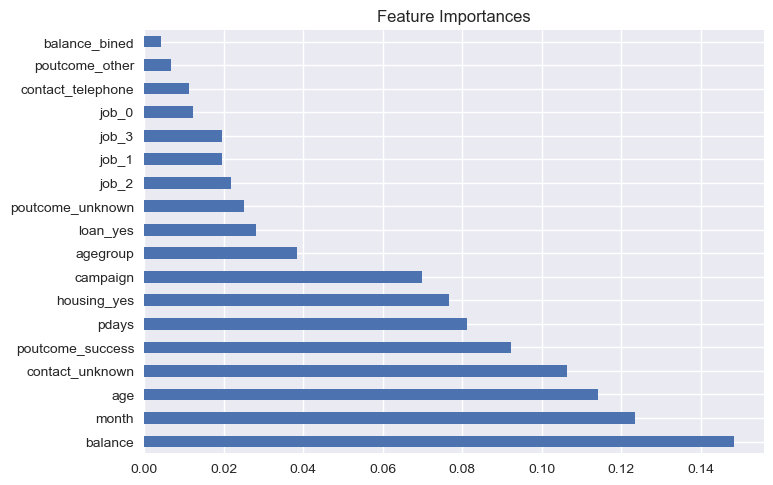

In [740]:
coef1 = pd.Series(best_model[2].feature_importances_, features_encoding_transformer.get_feature_names_out()).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari data diatas dapat dilihat faktor mana yang mempengaruhi potensi nasabah dan model machine learning. Fitur yang paling penting adalah balance, selanjutnya adalah masa month, dan umur nasabah. Analisa dapat ditingkatkan dengan melakukan feature selection atau kombinasi dari fitur-fitur yang berpengaruh untuk mengurangi kompleksitas model dan dibandingkan dengan model terbaik yang sekarang.

### Model akhir

In [741]:
# Export model
best_model = rf_grid.best_estimator_
Churn_model = best_model.fit(X_train, y_train)
pickle.dump(Churn_model, open('Model_final.sav', 'wb'))

### Conclusion and Recommendation

In [742]:
print('Classification Report Tuned Random Forest : \n', report_tuned)

Classification Report Tuned Random Forest : 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       815
           1       0.75      0.65      0.69       746

    accuracy                           0.73      1561
   macro avg       0.73      0.72      0.72      1561
weighted avg       0.73      0.73      0.72      1561



Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model yang sudah dibuat, model dapat mengetahui 80% nasabah yang tidak berpotensi mengajukan deposit dan 65% nasabah berpotensi mengajukan deposit berdasarkan recall. Selain itu model memiliki kemungkinan prediksi benar untuk nasabah yang berpotensi mengajukan deposit sebesar 75%. Maka masih ada pelanggan yang tidak berpotensi dan diprediksi sebagai berpotensi sebesar 29%.

Bila seandainya biaya untuk melakukan penawaran setiap nasabah 10$, dan andaikan jumlah nasabah yang kita miliki untuk suatu kurun waktu sebanyak 200 orang (dimana andaikan 100 orang tertarik, dan 100 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :


Tanpa Model (Semua nasabah diberikan penawaran):

- Total Biaya => 200 x 10 USD = 2000 USD
- Total Kandidat Tertarik yang didapatkan => 100 orang (karena semua kita tawarkan)
- Total Kandidat Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 100 x 10 USD = 1000 USD (karena 100 orang menolak dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya kandidat yang diprediksi oleh model tertarik yang kita check dan tawarkan) :

- Total Biaya => (65 x 10 USD) + (29 x 10 USD) = 650 USD + 290 USD = 930 USD
- Total Kandidat Tertarik yang didapatkan => 65 orang (karena recall nasabah tertarik dan benar 65%)
- Total Kandidat Tertarik yang tidak didapatkan => 35 orang (karena recall nasabah tidak tertarik diprediksi)
- Biaya yang terbuang => 29 x 10 USD = 290 USD (berdasarkan recall 0/yg tidak tertarik (29 orang menolak tawaran/tidak tertarik))
- Jumlah penghematan => 80 x 10 USD = 800 USD (yang dihitung hanya yang memang tidak tertarik saja, kalau yang tertarik tapi tidak ditawarkan itu tidak dihitung disini)
Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah kandidat potensial/kandidat yg tertarik.

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar dan dapat menghemat waktu dalam proses menyeleksi

### Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :

- Memperbarui data untuk beberapa kolom yang memiliki nilai unknown agar diupdate sesuai dengan status aktual.
- Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan dengan ketertarikannya, seperti alamat kandidatnya (untuk menghitung jarak dari tempat tinggalnya ke kantor perusahaan tersebut), jabatan pekerjaannya sekarang (apakah karyawan, manager, direktur, dan sebagainya), tunjangan apa saja yang didapatkan ditempat kerjanya sekarang, dll.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, seperti random over sampling
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.